https://www.kaggle.com/anmour/convolutional-autoencoder-with-keras

```
`# This is formatted as code`
```



In [0]:
import numpy as np
import tensorflow as tf


from matplotlib import pyplot as plt
import numpy as np
import gzip
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [0]:
array = np.load('/content/drive/My Drive/Máster KSchool/TFM/Codigos/images.npy')

In [0]:
array.shape

(113, 268, 182, 3)

In [0]:
x_train, x_test = train_test_split(array,test_size=0.20)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(90, 268, 182, 3)
(23, 268, 182, 3)


In [0]:
## input layer
input_layer = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3] ))

conv1 = Conv2D(128, (3, 3), activation='relu', padding='same')(input_layer)#28 x 28 x 32
conv1 = Conv2D(128, (2, 2), strides=(2,2), activation='relu', padding='same')(conv1)
conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1) #14 x 14 x 64
conv1 = Conv2D(64, (2, 2), strides=(2,1), activation='relu', padding='same')(conv1)
conv1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(conv1) #14 x 14 x 64
latent = MaxPooling2D(pool_size=(2, 2))(conv1)
#decoder

conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(latent)
up1 = UpSampling2D((2,1))(conv2) 
conv2 = Conv2D(128, (3,3), activation='relu', padding='same')(up1)
up1 = UpSampling2D((2,2))(conv2)

conv2 = Conv2D(3, (3,3), activation='sigmoid', padding='same')(up1)
up1 = UpSampling2D((2,2))(conv2)
decoded = ZeroPadding2D((2,1))(up1)
'''conv4 = Conv2D(64, (3, 3), activation='relu', activation='relu', padding='same')(conv4) #7 x 7 x 128

conv4 = Conv2D(128, (3, 3), activation='relu', activation='relu', padding='same')(up1) #7 x 7 x 128


decoded = Conv2D(3, (3, 3), activation='sigmoid', activation='relu', padding='same')(up1) # 28 x 28 x 3'''


## output layer


autoencoder = Model(input_layer, decoded)


# this model maps an input to its encoded representation
encoding_model = Model(input_layer, latent)

autoencoder.compile(loss='mean_squared_logarithmic_error', optimizer = 'adam')

autoencoder.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 268, 182, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 268, 182, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 134, 91, 128)      65664     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 134, 91, 64)       73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 67, 91, 64)        16448     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 67, 91, 3)         1731      
______________________________________________

In [0]:
'''## input layer
input_layer = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3] ))

conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)#28 x 28 x 32
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2) #14 x 14 x 64
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


#decoder
conv4 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128
up1 = UpSampling2D((2,2))(conv4) 
conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) #7 x 7 x 128
up1 = UpSampling2D((2,2))(conv4) 
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #7 x 7 x 128
up1 = UpSampling2D((2,2))(conv4) 

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up1) # 28 x 28 x 3
decoded = ZeroPadding2D((3,3))(decoded)
## output layer
autoencoder = Model(input_layer, decoded)
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

autoencoder.summary()'''

"## input layer\ninput_layer = Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3] ))\n\nconv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)#28 x 28 x 32\npool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32\nconv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64\npool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64\nconv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2) #14 x 14 x 64\npool2 = MaxPooling2D(pool_size=(2, 2))(conv2)\n\n\n#decoder\nconv4 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128\nup1 = UpSampling2D((2,2))(conv4) \nconv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) #7 x 7 x 128\nup1 = UpSampling2D((2,2))(conv4) \nconv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) #7 x 7 x 128\nup1 = UpSampling2D((2,2))(conv4) \n\ndecoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up1) # 28 x 28 x 3\ndecoded = ZeroPadding

In [0]:
from tqdm.keras import TqdmCallback

autoencoder.fit(x_train, x_train, epochs=100, validation_split=.2, callbacks=[TqdmCallback()], verbose=2)

Train on 72 samples, validate on 18 samples
Epoch 1/100
72/72 - 1s - loss: 0.0165 - val_loss: 0.0214
Epoch 2/100
72/72 - 1s - loss: 0.0164 - val_loss: 0.0212
Epoch 3/100
72/72 - 1s - loss: 0.0163 - val_loss: 0.0214
Epoch 4/100
72/72 - 1s - loss: 0.0162 - val_loss: 0.0210
Epoch 5/100
72/72 - 1s - loss: 0.0161 - val_loss: 0.0210
Epoch 6/100
72/72 - 1s - loss: 0.0159 - val_loss: 0.0208
Epoch 7/100
72/72 - 1s - loss: 0.0158 - val_loss: 0.0209
Epoch 8/100
72/72 - 1s - loss: 0.0158 - val_loss: 0.0214
Epoch 9/100
72/72 - 1s - loss: 0.0161 - val_loss: 0.0220
Epoch 10/100
72/72 - 1s - loss: 0.0162 - val_loss: 0.0210
Epoch 11/100
72/72 - 1s - loss: 0.0158 - val_loss: 0.0205
Epoch 12/100
72/72 - 1s - loss: 0.0158 - val_loss: 0.0207
Epoch 13/100
72/72 - 1s - loss: 0.0157 - val_loss: 0.0209
Epoch 14/100
72/72 - 1s - loss: 0.0157 - val_loss: 0.0209
Epoch 15/100
72/72 - 1s - loss: 0.0156 - val_loss: 0.0206
Epoch 16/100
72/72 - 1s - loss: 0.0155 - val_loss: 0.0204
Epoch 17/100
72/72 - 1s - loss: 0.015

In [0]:
!pip install tqdm --upgrade

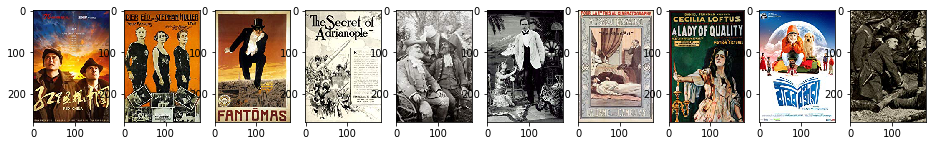

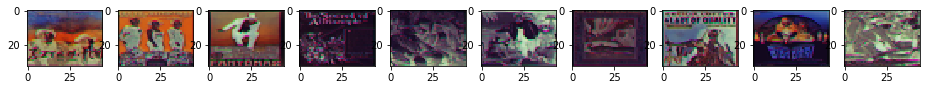

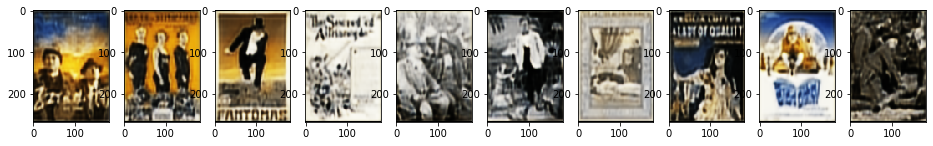

In [0]:
preds = autoencoder.predict(x_test)
preds_medias =encoding_model.predict(x_test)


f, ax = plt.subplots(1,10)
f.set_size_inches(16, 8)
for i in range(0,10):
    ax[i-10].imshow(x_test[i])

f, ax = plt.subplots(1,10)
f.set_size_inches(16, 8)
for i in range(0,10):
    ax[i-10].imshow(preds_medias[i])

f, ax = plt.subplots(1,10)
f.set_size_inches(16, 8)
for i in range(0,10):
    ax[i-10].imshow(preds[i])


plt.show()